In [22]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [23]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


In [24]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [28]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [29]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [30]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [31]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x000002665D4F9760>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x000002665D4F9760>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x000002665D4F9760>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x000002665D4F9760>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x000002665D4F9760>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x000002665D4F9760>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [32]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:20<00:00,  9.84it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [33]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,109,86.399663,10.0,0.606364,69.119377,10.0,0.436512,124.014339,10.0,0.743172,...,8,0,10,7,2,3,0,4,0,dikesnet
1,91,89.719347,1.5,0.348171,349.695985,1.5,0.615013,241.373312,1.5,0.507845,...,8,0,10,7,2,3,0,5,0,dikesnet
2,83,67.482786,1.0,0.598151,196.402607,1.5,0.511972,109.693898,1.5,0.846453,...,8,0,10,7,2,3,0,6,0,dikesnet
3,57,235.697807,1.5,0.250358,108.135591,1.5,0.418647,249.708490,10.0,0.948137,...,8,0,10,7,2,3,0,7,0,dikesnet
4,15,224.242772,1.0,0.551585,295.499109,1.5,0.394469,282.200653,1.0,0.388218,...,8,0,10,7,2,3,0,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,105,244.509648,10.0,0.371468,231.090804,1.0,0.216978,268.743949,1.5,0.272288,...,7,9,6,4,6,0,3,49,3,dikesnet
196,78,291.325454,1.0,0.928232,138.274278,10.0,0.972991,63.258166,1.5,0.285445,...,7,9,6,4,6,0,3,50,3,dikesnet
197,102,338.469770,1.5,0.742739,243.675606,1.5,0.542642,58.833252,10.0,0.868697,...,7,9,6,4,6,0,3,51,3,dikesnet
198,61,221.654138,1.5,0.529574,125.150187,1.0,0.677090,153.357047,1.0,0.439242,...,7,9,6,4,6,0,3,52,3,dikesnet


In [34]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.579128e+08,0.0,3.050071e+08,0.000000,9.340602e+07,0.000122,4.277965e+07,0.0,1.201532e+08,0.0,1.238200e+09,0.000000
1,1.579128e+08,0.0,3.050071e+08,0.000000,1.132871e+08,0.043901,4.277965e+07,0.0,1.201532e+08,0.0,1.238200e+09,0.000000
2,1.579128e+08,0.0,3.050071e+08,0.000000,9.331628e+07,0.000000,4.277965e+07,0.0,1.201532e+08,0.0,1.238200e+09,0.000000
3,1.579128e+08,0.0,3.050071e+08,0.000000,9.331628e+07,0.000000,4.277965e+07,0.0,1.201532e+08,0.0,1.238200e+09,0.000000
4,1.579128e+08,0.0,3.050071e+08,0.000000,1.095832e+08,0.043387,4.277965e+07,0.0,1.201532e+08,0.0,1.238200e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.941184e+08,0.0,2.006754e+08,0.001348,9.773528e+07,0.000000,5.876352e+07,0.0,7.944417e+07,0.0,9.852000e+08,671.170439
196,2.941184e+08,0.0,1.906600e+08,0.000000,9.773528e+07,0.000000,5.876352e+07,0.0,7.944417e+07,0.0,9.852000e+08,0.000000
197,2.941184e+08,0.0,1.906600e+08,0.000000,9.773528e+07,0.000000,5.876352e+07,0.0,7.944417e+07,0.0,9.852000e+08,0.000000
198,2.941184e+08,0.0,1.906600e+08,0.000000,9.773528e+07,0.000000,5.876352e+07,0.0,7.944417e+07,0.0,9.852000e+08,0.000000


In [35]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [36]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:31<00:00,  9.55it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [37]:
experiments, outcomes = results

In [38]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.000000,2.073518e+08,0.188902,0.000000e+00,0.000000,3.761939e+07,0.017284,0.000000e+00,0.000000,253800000.0,0.0
1,5.397251e+07,0.000000,6.739431e+07,0.070828,1.292702e+08,0.257744,1.120540e+06,0.000630,1.881820e+07,0.019059,253800000.0,0.0
2,5.397251e+07,0.000000,1.093503e+09,0.705271,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
3,5.397251e+07,0.000000,1.692705e+08,0.153560,5.527982e+08,0.947807,9.017003e+07,0.038914,0.000000e+00,0.000000,253800000.0,0.0
4,5.397251e+07,0.000000,0.000000e+00,0.000000,8.566556e+07,0.133572,7.853732e+07,0.031449,5.718561e+08,0.429886,253800000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000e+00,0.000000,7.372792e+08,0.641233,2.879840e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,369700000.0,0.0
296,0.000000e+00,0.000000,8.757398e+06,0.008147,9.724534e+07,0.116572,6.929529e+07,0.029762,0.000000e+00,0.000000,369700000.0,0.0
297,0.000000e+00,0.000000,2.501622e+07,0.034662,2.879840e+07,0.000000,4.490547e+06,0.003206,0.000000e+00,0.000000,369700000.0,0.0
298,0.000000e+00,0.000000,3.815294e+07,0.034394,2.879840e+07,0.000000,0.000000e+00,0.000000,1.427563e+07,0.012406,369700000.0,0.0


In [41]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,9,213.113740,1.5,0.537561,35.297118,1.5,0.247732,341.338086,1.5,0.803279,...,0,0,0,0,0,0,0,54,policy 1,dikesnet
1,26,346.639809,1.5,0.024423,303.443095,10.0,0.512603,185.927654,1.0,0.472444,...,0,0,0,0,0,0,0,55,policy 1,dikesnet
2,23,83.225143,10.0,0.165892,296.109642,1.5,0.071048,72.555068,1.5,0.596601,...,0,0,0,0,0,0,0,56,policy 1,dikesnet
3,83,49.453440,1.0,0.634837,211.753368,1.5,0.319068,67.383478,10.0,0.339179,...,0,0,0,0,0,0,0,57,policy 1,dikesnet
4,53,130.272605,1.5,0.548362,347.646480,1.5,0.973989,151.553278,1.5,0.704524,...,0,0,0,0,0,0,0,58,policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,122.230691,1.0,0.687092,240.155733,1.0,0.006033,297.806700,1.5,0.401142,...,0,0,0,0,0,0,0,149,policy 3,dikesnet
296,13,194.820333,10.0,0.938033,183.143855,1.0,0.578550,267.663263,1.0,0.012681,...,0,0,0,0,0,0,0,150,policy 3,dikesnet
297,109,33.644905,10.0,0.595800,89.761507,1.0,0.506084,93.587762,1.5,0.368492,...,0,0,0,0,0,0,0,151,policy 3,dikesnet
298,47,38.463309,10.0,0.407446,312.458224,1.0,0.465881,107.977535,10.0,0.188953,...,0,0,0,0,0,0,0,152,policy 3,dikesnet


In [42]:
policies = experiments['policy']
data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [43]:
data

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,5.397251e+07,0.000000,2.073518e+08,0.188902,0.000000e+00,0.000000,3.761939e+07,0.017284,0.000000e+00,0.000000,253800000.0,0.0,policy 1
1,5.397251e+07,0.000000,6.739431e+07,0.070828,1.292702e+08,0.257744,1.120540e+06,0.000630,1.881820e+07,0.019059,253800000.0,0.0,policy 1
2,5.397251e+07,0.000000,1.093503e+09,0.705271,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0,policy 1
3,5.397251e+07,0.000000,1.692705e+08,0.153560,5.527982e+08,0.947807,9.017003e+07,0.038914,0.000000e+00,0.000000,253800000.0,0.0,policy 1
4,5.397251e+07,0.000000,0.000000e+00,0.000000,8.566556e+07,0.133572,7.853732e+07,0.031449,5.718561e+08,0.429886,253800000.0,0.0,policy 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000e+00,0.000000,7.372792e+08,0.641233,2.879840e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,369700000.0,0.0,policy 3
296,0.000000e+00,0.000000,8.757398e+06,0.008147,9.724534e+07,0.116572,6.929529e+07,0.029762,0.000000e+00,0.000000,369700000.0,0.0,policy 3
297,0.000000e+00,0.000000,2.501622e+07,0.034662,2.879840e+07,0.000000,4.490547e+06,0.003206,0.000000e+00,0.000000,369700000.0,0.0,policy 3
298,0.000000e+00,0.000000,3.815294e+07,0.034394,2.879840e+07,0.000000,0.000000e+00,0.000000,1.427563e+07,0.012406,369700000.0,0.0,policy 3


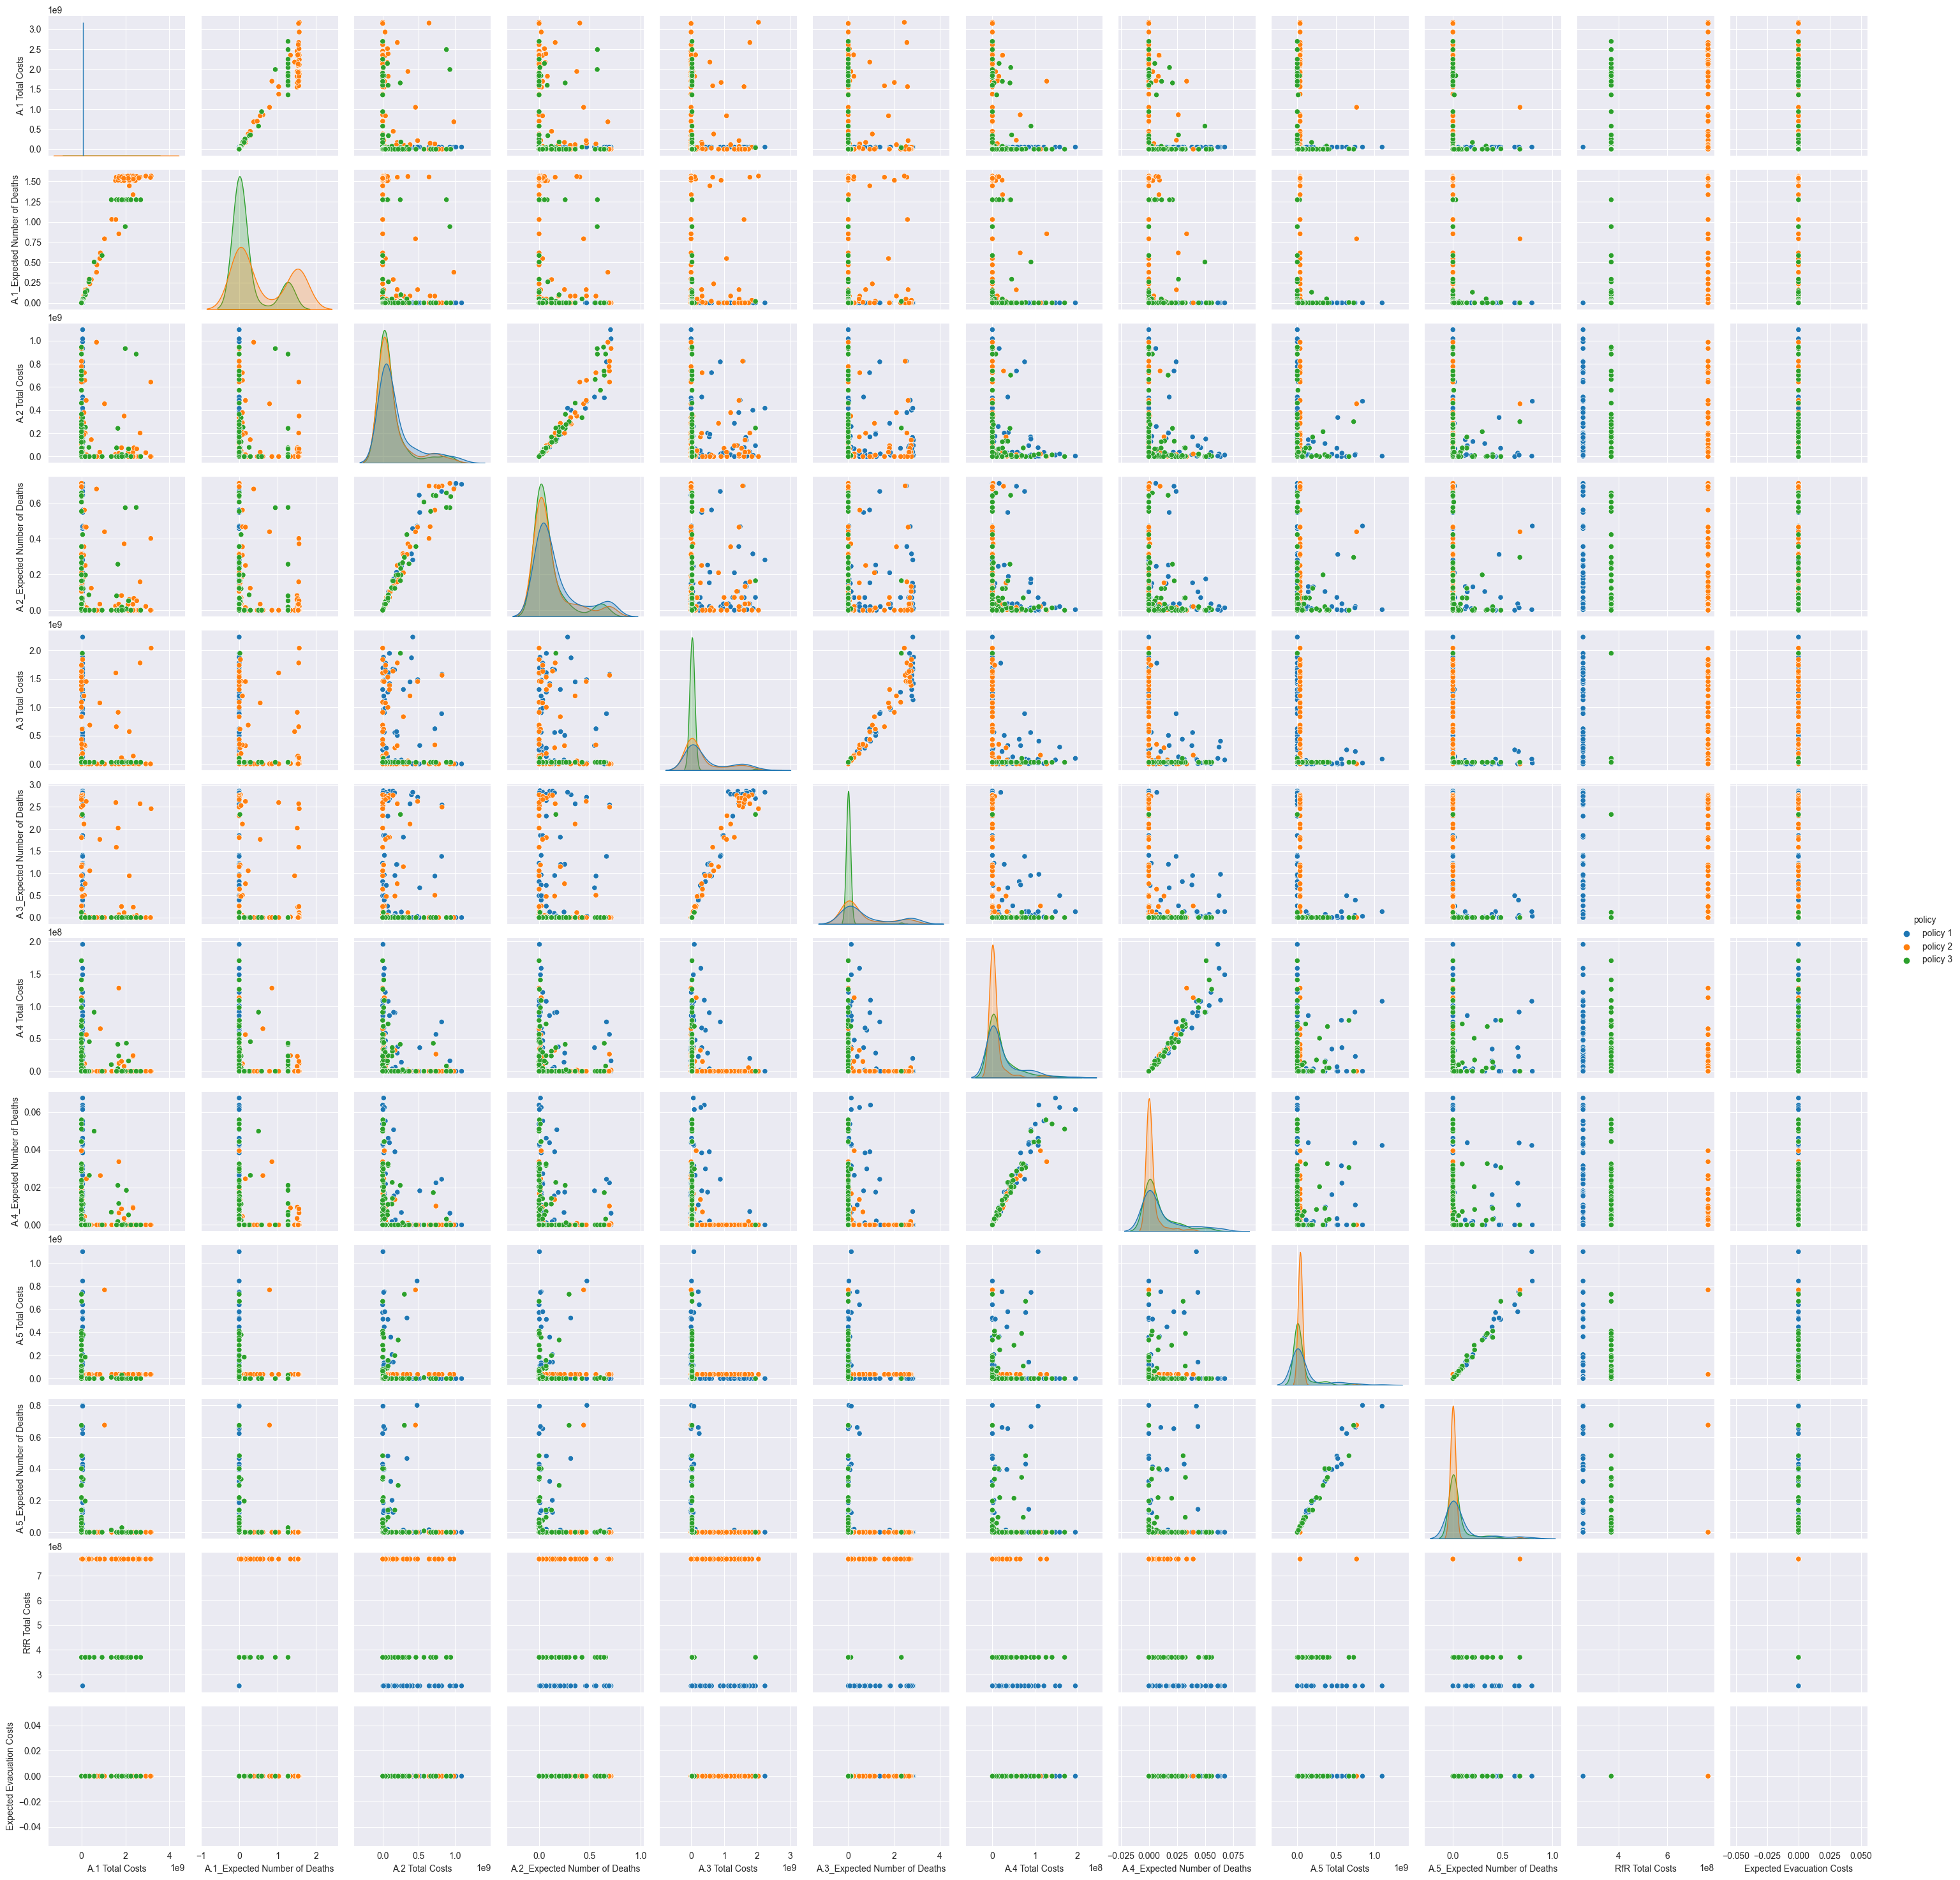

In [44]:
sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()